In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Make a list of stories data only
csv_files = [csv_file for csv_file in glob.glob('/kaggle/input/hespress/*.csv') if 'stories' in csv_file]

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate over the CSV files and add them to the DataFrame
for csv_file in csv_files:
    df_temp = pd.read_csv(csv_file, index_col=0, encoding="utf-8")
    df = pd.concat([df, df_temp], ignore_index=True)

# Show random rows from the DataFrame
df.sample(5)

,id,title,date,author,story,topic
1577,a0b2527e055111eb9ec9646e69d991ea,الكوميدي باسو ينثر أجواء الفكاهة بمونتريال وكيبيك,السبت 22 فبراير 2020 - 14:20,هسبريس من الرّباط,عاش أفراد من الجالية المغربية بمدينتي مونتريال...,art-et-culture
5900,8c22eb4004ed11eba2ab646e69d991ea,الشركات المغربية تقلص وارداتها من الشاي الصيني,الأربعاء 06 ماي 2020 - 07:02,هسبريس – محمد لديب,قلّصت الشركات المغربية من حجم وارداتها من الشا...,economie
4915,3b57828a04f811eb87b3646e69d991ea,"نقابة الصحافة تتضامن مع العاملين في ""المنعطف""",الثلاثاء 14 ماي 2019 - 10:30,هسبريس من الرباط,أعرب فرع الرباط للنقابة الوطنية للصحافة المغرب...,medias
7785,37edcfb604e811eba52b646e69d991ea,خطاب العرش يُطْلق عملية تعميم التغطية الاجتماع...,الأربعاء 29 يوليوز 2020 - 22:55,هسبريس من الرباط,اعتبر الملك محمد السادس أن الوقت قد حان لإطلاق...,societe
5608,0c57de5c04ec11eba8ce646e69d991ea,تقرير رسمي يوصي بإحداث وكالة للسلامة الصحية لل...,الخميس 18 يونيو 2020 - 07:00,هسبريس - محمد الراجي,أوصى المجلس الاقتصادي والاجتماعي والبيئي بإحدا...,economie


In [3]:
# Dataframe dimensions 
f'Records: {df.shape[0]} & Features: {df.shape[1]}'

'Records: 11000 & Features: 6'

In [4]:
df.describe()

,id,title,date,author,story,topic
count,11000,11000,11000,11000,11000,11000
unique,11000,10934,10942,874,10996,11
top,9d9ebd0204f811eb92ec646e69d991ea,تفاصيل الحالة الوبائية في جهة درعة - تافيلالت,الخميس 23 يوليوز 2020 - 01:25,هسبريس من الرباط,جدّد عبد اللطيف الجواهري، والي بنك المغرب، الد...,faits-divers
freq,1,27,2,3941,2,1000


In [5]:
# Check for null values
df.isnull().sum()

id        0
title     0
date      0
author    0
story     0
topic     0
dtype: int64

In [6]:
# Check for duplicated values
df.duplicated().sum()

0

In [7]:
# Create a dictionary that maps the Moroccan language topic names to English topic names.
topic_mapping = {
    "tamazight": "Tamazight",
    "sport": "Sport",
    "societe": "Society",
    "regions": "Regions",
    "politique": "Politics",
    "orbites": "World News",
    "medias": "Local News",
    "marocains-du-monde": "Moroccans Abroad",
    "faits-divers": "Miscellaneous",
    "art-et-culture": "Art and Culture",
    "economie": "Economy"
}

# Translate topic names to english
df['topic'] = df['topic'].replace(topic_mapping)

# Show topic names
df['topic'].unique()

array(['Miscellaneous', 'Art and Culture', 'Regions', 'Sport',
       'Local News', 'Economy', 'Tamazight', 'Society', 'World News',
       'Politics', 'Moroccans Abroad'], dtype=object)

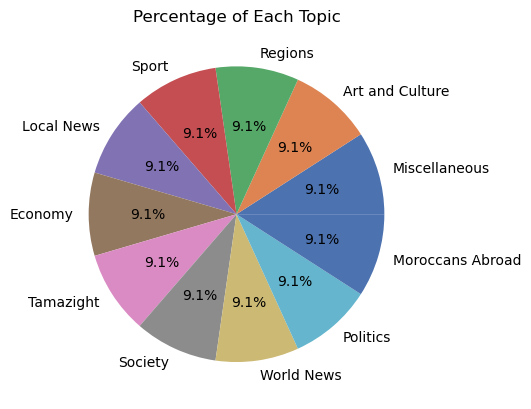

In [8]:
# Plot pie chart of percentage stories per topic

plt.pie(df["topic"].value_counts(), labels=df["topic"].value_counts().index, autopct="%.1f%%", colors=sns.color_palette(palette='deep'))
plt.title("Percentage of Each Topic")

# Show the pie chart.
plt.show()

In [9]:
# Load the Arabic stop words
stop_words_arabic = nltk.corpus.stopwords.words('arabic')

# Function to remove stop words from a text
def remove_stopwords(text):
    words = word_tokenize(text)    
    filtered_words = [word for word in words if word not in stop_words_arabic]
    return ' '.join(filtered_words)

# Remove stop words from the 'story' column
df['story_without_stopwords'] = df['story'].apply(remove_stopwords)
df[['story', 'story_without_stopwords']]

,story,story_without_stopwords
0,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...
1,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...
2,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...
3,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,كشف مصدر أمني مسؤول التلميذة المتحدرة جماعة تن...
4,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...
...,...,...
10995,أعلنت وزارة التربية الوطنية والتكوين المهني وا...,أعلنت وزارة التربية الوطنية والتكوين المهني وا...
10996,لا يلفظ اسم العربي الحروشي في سلطنة عمان إلا و...,يلفظ اسم العربي الحروشي سلطنة عمان مقترن بعبار...
10997,طال المقام بالمغربية غزلان الصيابري في تجربة ا...,طال المقام بالمغربية غزلان الصيابري تجربة الهج...
10998,يعيش هشام تسمارت أواخر سنين العقد الثالث من حي...,يعيش هشام تسمارت أواخر سنين العقد الثالث حياته...


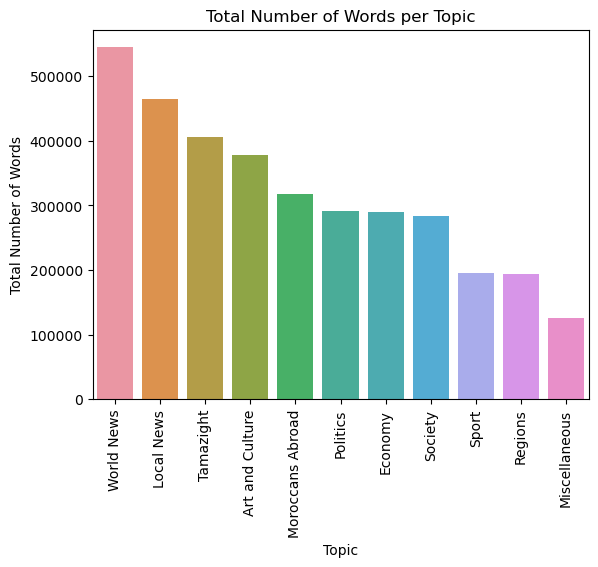

In [10]:
# Calculate number of words and characters per story
df['len_word'] = df['story_without_stopwords'].str.split().apply(len)

# Plot bar chart of number of words per topic
sns.barplot(x='topic', y='len_word', data=df.groupby(['topic'])['len_word'].sum().reset_index().sort_values('len_word', ascending=False))
plt.title("Total Number of Words per Topic")
plt.xlabel('Topic')
plt.ylabel('Total Number of Words')
plt.xticks(rotation=90)

# Show the bar chart.
plt.show()

In [11]:
# Compute the word matrix for all topics
cv = CountVectorizer()
matrix = cv.fit_transform(df['story_without_stopwords'])
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())
word_matrix

,00,000,001,002,00212613500678,00212661336854,0021698765801,0022243065974,0031616010107,0031626491030,...,ﻳﺴﻤﻰ,ﻳﺴﻤﻴﻪ,ﻳﺼﺎﺩﻑ,ﻳﻌﺘﺒﺮ,ﻳﻌﺘﺰﻣﻮن,ﻳﻨﺎﻳﺮ,ﻳﻮاﺻﻠﻮن,ﻴﺠﺘﻤﻌﻮﻥ,ﻴﻌﻴﺪﻭﺍ,ﻵﺟﺎل
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Index(['المغرب', 'خلال', 'المغربية', 'كورونا', 'الأمازيغية', 'أنه', 'المغربي',
       'حالة', 'سنة', 'وفي', 'الحكومة', 'محمد', 'اليوم', 'الوطنية', 'الوطني',
       'تم', 'أن', 'عدد', 'العام', 'المغاربة', 'رئيس', 'كانت', 'حول', 'بشكل',
       'عبر'],
      dtype='object')


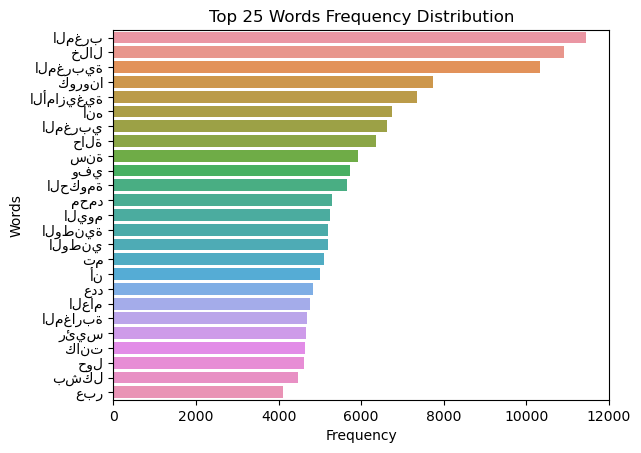

In [12]:
# Calculate the top 25 words in frequency
top_words = word_matrix.sum().sort_values(ascending=False)[:25]
print(top_words.index)

#Plot frequency distribution of the top 25 words
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Top 25 Words Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Show plot
plt.show()

In [13]:
# Create lists for the top and least frequent words
top = []
least = []

# Compute the word matrix for each topic
cv = CountVectorizer()

for t in df['topic'].unique():
    matrix = cv.fit_transform(df[df['topic'] == t]['story_without_stopwords'])
    word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())
    words_df = word_matrix.sum().sort_values(ascending=False)
    top.append(words_df[:1].index[0])
    least.append(words_df[-1:].index[0])    
    
# Create a dataframe of all topics and their frequent words
freq = pd.DataFrame({'Topic': df['topic'].unique(), 'Top Frequent': top, 'Least Frequent': least})
freq

,Topic,Top Frequent,Least Frequent
0,Miscellaneous,العامة,ﯕناوة
1,Art and Culture,المغربي,ﻭﺍﻟﺮﺟﺎﻝ
2,Regions,حالة,ݣوانتنامو
3,Sport,القدم,سؤالا
4,Local News,المغربية,یشتغلون
5,Economy,المائة,ستضم
6,Tamazight,الأمازيغية,ﻴﻌﻴﺪﻭﺍ
7,Society,حالة,ﺣﺎﻟﺔ
8,World News,المغرب,ﮔويا
9,Politics,الحكومة,یعني
